<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/15324_normal_OD_cup_vs_large_OD_cup_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np


In [ ]:
os.listdir('/content/drive/MyDrive/optic cup images/split')

['train', 'val', 'test']

In [ ]:
os.listdir('/content/drive/MyDrive/optic cup images/split/train'),os.listdir('/content/drive/MyDrive/optic cup images/split/val'),os.listdir('/content/drive/MyDrive/optic cup images/split/test')

(['normal cup', 'large cup'],
 ['normal cup', 'large cup'],
 ['normal cup', 'large cup'])

In [ ]:
trainnormalcup = os.listdir('/content/drive/MyDrive/optic cup images/split/train/normal cup')
trainnormalcup
print(len(trainnormalcup))

30


In [ ]:
trainlargecup = os.listdir('/content/drive/MyDrive/optic cup images/split/train/large cup')
trainlargecup
print(len(trainlargecup))

40


In [2]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

In [3]:
trainimages = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/train',
                                          target_size=(224,224))

validationimages = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/val',
                                          target_size=(224,224))

testimages = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/test',
                                          target_size=(224,224))

Found 70 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential([Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
                    MaxPooling2D(2,2),

                    Conv2D(32,(3,3), activation='relu',),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(2, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [11]:
model.fit(trainimages,
          batch_size=10,
          epochs=20,
          validation_data=validationimages)
model.save('normalcupvslargecup_model.keras')

Epoch 1/20
3/3 [==============================] - 4s 2s/step - loss: 0.3856 - accuracy: 0.8429 - val_loss: 0.7574 - val_accuracy: 0.7500
Epoch 2/20
3/3 [==============================] - 3s 765ms/step - loss: 0.3887 - accuracy: 0.8286 - val_loss: 0.5571 - val_accuracy: 0.7500
Epoch 3/20
3/3 [==============================] - 4s 2s/step - loss: 0.3005 - accuracy: 0.8286 - val_loss: 0.3807 - val_accuracy: 0.8750
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.2211 - accuracy: 0.9143 - val_loss: 0.5474 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.2356 - accuracy: 0.9000 - val_loss: 0.5082 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 3s 807ms/step - loss: 0.1970 - accuracy: 0.9286 - val_loss: 0.2243 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 3s 742ms/step - loss: 0.2196 - accuracy: 0.9000 - val_loss: 0.4413 - val_accuracy: 0.7500
Epoch 8/20
3/3 [================

In [12]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 0s 380ms/step


array([[7.2723557e-03, 9.9272764e-01],
       [9.9902165e-01, 9.7838556e-04],
       [9.9380642e-01, 6.1935829e-03],
       [9.9601710e-01, 3.9828508e-03],
       [9.4720984e-01, 5.2790161e-02],
       [7.1816318e-02, 9.2818373e-01],
       [8.2123864e-01, 1.7876129e-01],
       [4.3473208e-01, 5.6526792e-01],
       [4.1939460e-10, 1.0000000e+00],
       [9.9767643e-01, 2.3235315e-03]], dtype=float32)

In [13]:
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [8]:
y_true=testimages.classes

In [9]:
testimages.class_indices

{'large cup': 0, 'normal cup': 1}

In [14]:
from sklearn import metrics
metrics.confusion_matrix(y_true,y_pred1)

array([[4, 1],
       [2, 3]])

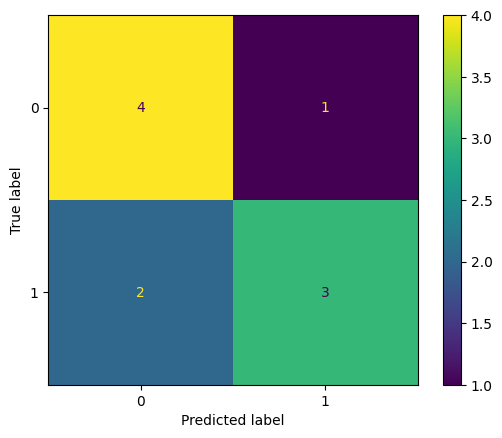

In [15]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred1)

In [16]:
print(metrics.classification_report(y_true,y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



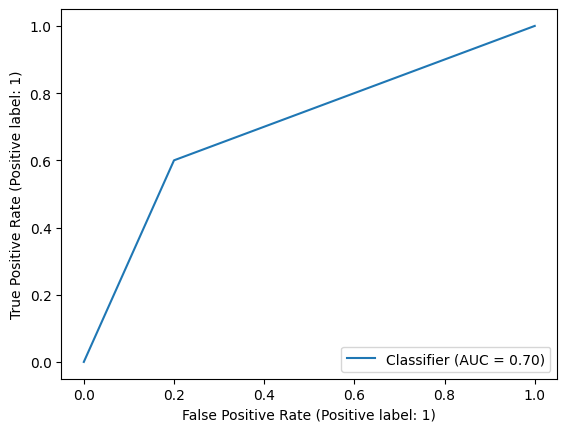

In [17]:
metrics.RocCurveDisplay.from_predictions(y_true,y_pred1)